In [19]:
#Import packages
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In [20]:
# Load the data as a data frame by using URL
data_path = 'EPL_Soccer_MLR_LR.csv'
df = pd.read_csv(data_path)

In [21]:
# check the columns
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [22]:
# check the shape of the data
df.shape

(202, 13)

In [23]:
# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [24]:
#Correlation matrix
corr = df.corr()
corr

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


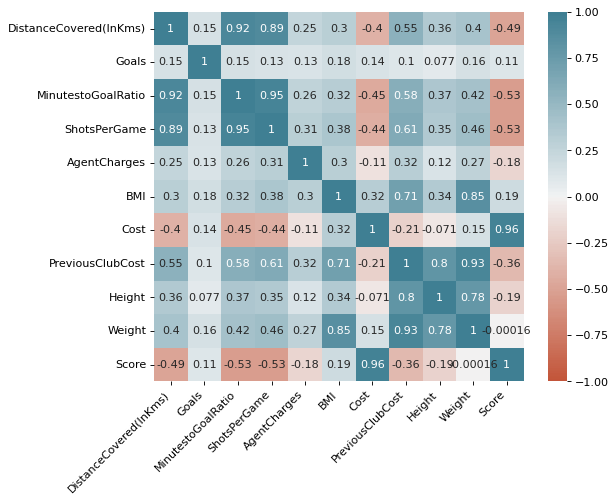

In [26]:
#Colored graph of correlations
plt.figure(figsize=(8, 6), dpi=80)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); # use xticklabels to rotate labels by 45 degress

#Remove weakly correlated variables
#Weight


#Some highly multicollinear predictors: MinutestoGoalRatio, ShotsPerGame
#Remove MinutestoGoalRatio

#PreviousClubCost, Height, Weight
#Discard height and weight, keep previousclubcost

In [27]:
# Extract predictor variables (remove categorical variables like team)
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

In [28]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [29]:
# Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           9.69e-96
Time:                        21:01:43   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [30]:
#Can we trim some variables and see how it performs?
X=df[['DistanceCovered(InKms)'
        , 'BMI', 'Cost',
       'PreviousClubCost']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          9.28e-100
Time:                        21:01:57   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

In [31]:
#Let's try throwing in club data using dummy variables
clubs=set(df.Club)
clubs

nominal_features = pd.get_dummies(df['Club'])
nominal_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
# concat dummy variables
df_encoded=pd.concat([df,nominal_features], axis=1)
df_encoded.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [33]:
# Run with club encoding
X=df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.79e-103
Time:                        21:02:40   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

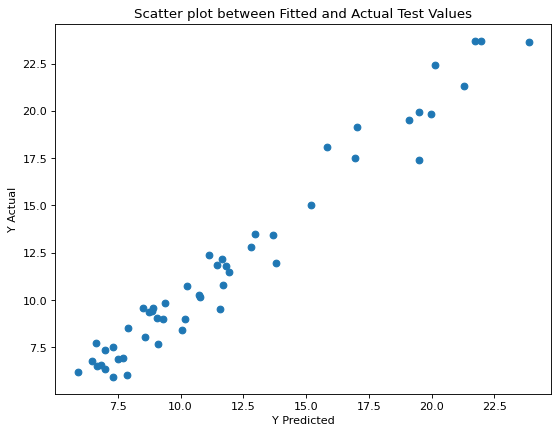

In [34]:
#Look at model plot
plt.figure(figsize=(8, 6), dpi=80)
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Scatter plot between Fitted and Actual Test Values")
plt.show()